# *Agave angustifolia* - Genotyping by sequencing
## Eddy Mendoza-Galindo, Agrigenomic Sciences Bachelor's thesis
### ENES León, UNAM

29/03/2022

We received the raw FASTQ directory in [MAZORKA](http://mazorka.langebio.cinvestav.mx/):
LUSTRE/usuario/nigenda/SAGARPA/agave_gbs/rawdata

There were 215 files

I linked them to my files: <ln -s /LUSTRE/usuario/nigenda/SAGARPA/agave_gbs/rawdata/ raw/mylustre/agave/gbs/>

In [3]:
# Then, I used BWA to index the genome:
! cat scripts/bwa_agave_index.sh

#PBS -N bwa_index
#PBS -q default
#PBS -l nodes=1:ppn=16,mem=32gb,vmem=16gb,walltime=120:00:00
#PBS -V
#PBS -o scripts/exegfiles/agavebwa_index.o
#PBS -e scripts/exegfiles/agavebwa_index.e
#PBS -M eddyjmeg@gmail.com

# Llamamos los m<C3><B3>dulos y le decimos que use el direcotrio actual de referencia (home)

cd $PBS_O_WORKDIR
module load bwa/0.7.15

# Genome Index

bwa index raw/mylustre/agave/genome.fasta

## Metadata

In [9]:
! pwd

/mnt/c/Users/52722/Desktop/Agave/popgen


In [58]:
import pandas as pd
seq = pd.read_csv("biogeo/accession.list", sep='\t', header=None)
seq.rename(columns={0: 'name', 1: 'file'}, inplace=True)
seq

,name,file
0,AH1AV1SS01,AH1AV1SS01_S161_L002_R1_001.fastq
1,AH1AV1SS02,AH1AV1SS02_S162_L002_R1_001.fastq
2,AH1AV1SS03,AH1AV1SS03_S163_L002_R1_001.fastq
3,AH1AV1SS04,AH1AV1SS04_S164_L002_R1_001.fastq
4,AH1AV1SS05,AH1AV1SS05_S165_L002_R1_001.fastq
...,...,...
210,AH1AV1SS95,AH1AV1SS95_S255_L002_R1_001.fastq
211,AH1AV1SS96,AH1AV1SS96_S256_L002_R1_001.fastq
212,AH1AV1SS97,AH1AV1SS97_S257_L002_R1_001.fastq
213,AH1AV1SS98,AH1AV1SS98_S258_L002_R1_001.fastq


In [59]:
ids = pd.read_csv("biogeo/names.tsv", sep='\t', header=None)
ids.rename(columns={0: 'id', 1: 'name'}, inplace=True)
ids

,id,name
0,CRIS2_11,AH1AV1SS01
1,SCL_4,AH1AV1SS02
2,NAY2_4,AH1AV1SS03
3,COL_7,AH1AV1SS04
4,BAC_7,AH1AV1SS05
...,...,...
210,Y_7h,AH1AV1SS211
211,CEES_5,AH1AV1SS212
212,COL_8,AH1AV1SS213
213,TOL_12,AH1AV1SS214


In [60]:
names = pd.merge(ids, seq, on="name")
names

,id,name,file
0,CRIS2_11,AH1AV1SS01,AH1AV1SS01_S161_L002_R1_001.fastq
1,SCL_4,AH1AV1SS02,AH1AV1SS02_S162_L002_R1_001.fastq
2,NAY2_4,AH1AV1SS03,AH1AV1SS03_S163_L002_R1_001.fastq
3,COL_7,AH1AV1SS04,AH1AV1SS04_S164_L002_R1_001.fastq
4,BAC_7,AH1AV1SS05,AH1AV1SS05_S165_L002_R1_001.fastq
...,...,...,...
210,Y_7h,AH1AV1SS211,AH1AV1SS211_S24_L001_R1_001.fastq
211,CEES_5,AH1AV1SS212,AH1AV1SS212_S25_L001_R1_001.fastq
212,COL_8,AH1AV1SS213,AH1AV1SS213_S26_L001_R1_001.fastq
213,TOL_12,AH1AV1SS214,AH1AV1SS214_S27_L001_R1_001.fastq


In [61]:
data = pd.read_csv("biogeo/AGAVE_Metadatos_24Feb2022.csv")
data.pheno = data.pheno.fillna(0.0).astype(int) # fill NA and convert to INT
data

,id,sp,pheno,botanic,group,var,state,loc,lat,lon
0,AP_1,Agave_angustifolia,1,true,complex,NaN,Jalisco,Apango,19.761111,-103.706944
1,AP_2,Agave_angustifolia,1,true,complex,NaN,Jalisco,Apango,19.761111,-103.706944
2,AP_3,Agave_angustifolia,1,true,complex,NaN,Jalisco,Apango,19.761111,-103.706944
3,AP_4,Agave_angustifolia,1,true,complex,NaN,Jalisco,Apango,19.761111,-103.706944
4,AP_5,Agave_angustifolia,1,true,complex,NaN,Jalisco,Apango,19.761111,-103.706944
...,...,...,...,...,...,...,...,...,...,...
210,A_decipiens,Agave_decipiens,0,true,out,NaN,Sinaloa,Yavaros,26.706924,-109.548312
211,Y_1e,Agave_decipiens,0,true,out,NaN,Sinaloa,Yavaros,26.706924,-109.548312
212,Y_4h,Agave_decipiens,0,true,out,NaN,Sinaloa,Yavaros,26.706924,-109.548312
213,Y_5h,Agave_decipiens,0,true,out,NaN,Sinaloa,Yavaros,26.706924,-109.548312


In [62]:
metadata = pd.merge(names, data, on="id")
metadata

,id,name,file,sp,pheno,botanic,group,var,state,loc,lat,lon
0,CRIS2_11,AH1AV1SS01,AH1AV1SS01_S161_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Jalisco,San_Cristóbal_de_la_Barranca,21.020458,-103.420906
1,SCL_4,AH1AV1SS02,AH1AV1SS02_S162_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,Ejido_San_Clemente,29.695167,-109.640528
2,NAY2_4,AH1AV1SS03,AH1AV1SS03_S163_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Nayarit,El_Nayar_2,22.172366,-104.727507
3,COL_7,AH1AV1SS04,AH1AV1SS04_S164_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,El_Colorado,28.301944,-111.401806
4,BAC_7,AH1AV1SS05,AH1AV1SS05_S165_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,Bacanora,28.991917,-109.391833
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Y_7h,AH1AV1SS211,AH1AV1SS211_S24_L001_R1_001.fastq,Agave_decipiens,0,true,out,NaN,Sinaloa,Yavaros,26.706924,-109.548312
211,CEES_5,AH1AV1SS212,AH1AV1SS212_S25_L001_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,Centro_Ecológico_de_Sonora,29.013944,-110.953528
212,COL_8,AH1AV1SS213,AH1AV1SS213_S26_L001_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,El_Colorado,28.301944,-111.401806
213,TOL_12,AH1AV1SS214,AH1AV1SS214_S27_L001_R1_001.fastq,Agave_angustifolia,1,aff,complex,Lineño_silvestre,Jalisco,Tolimán,19.593056,-103.895556


In [6]:
metadata.to_csv("metadata.tsv", sep='\t', index=False)

## Principal Component Analysis

In [15]:
# Extracting of linked SNPs
! mkdir plink
! plink --vcf populations.snps.vcf --allow-extra-chr --make-bed --out plink/species
! plink --bfile plink/species --allow-extra-chr --indep-pairwise 50 10 0.1 --out plink/linked
# Now we prune the original SNP dataset to leave non-linked SNPs
! echo "___________________________________________"
! plink --bfile plink/species --allow-extra-chr --extract plink/linked.prune.in --make-bed --out plink/pruned

mkdir: cannot create directory ‘plink’: File exists
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/species.log.
Options in effect:
  --allow-extra-chr
  --make-bed
  --out plink/species
  --vcf populations.snps.vcf

7101 MB RAM detected; reserving 3550 MB for main workspace.
--vcf: plink/species-temporary.bed + plink/species-temporary.bim +
plink/species-temporary.fam written.
72770 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/species.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989

In [16]:
# Principal component analysis
! plink --bfile plink/pruned --allow-extra-chr --pca --out plink/pca

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/pca.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/pruned
  --out plink/pca
  --pca

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/pca.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.876.
29617 variants and 215 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete.
--pca: Results saved t

In [53]:
# Merge PC results and metadata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pca = pd.read_csv("plink/pca.eigenvec", sep=' ', header=None)
pca = pca[[1,2,3]]
pca.columns = ["name", "PC1", "PC2"]
clusters = pd.merge(metadata, pca, on="name")
clusters.to_csv("plink/clusters.tsv", sep='\t', index=False, na_rep="NA")
clusters

,id,name,file,sp,pheno,botanic,group,var,state,loc,lat,lon,PC1,PC2
0,CRIS2_11,AH1AV1SS01,AH1AV1SS01_S161_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Jalisco,San_Cristóbal_de_la_Barranca,21.020458,-103.4209059,-0.030170,-0.058902
1,SCL_4,AH1AV1SS02,AH1AV1SS02_S162_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,Ejido_San_Clemente,29.695167,-109.640528,-0.028297,-0.068549
2,NAY2_4,AH1AV1SS03,AH1AV1SS03_S163_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Nayarit,El_Nayar_2,22.172366,-104.7275067,-0.025935,-0.045791
3,COL_7,AH1AV1SS04,AH1AV1SS04_S164_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,El_Colorado,28.301944,-111.401806,-0.028533,-0.069133
4,BAC_7,AH1AV1SS05,AH1AV1SS05_S165_L002_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,Bacanora,28.991917,-109.391833,-0.029705,-0.071629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Y_7h,AH1AV1SS211,AH1AV1SS211_S24_L001_R1_001.fastq,Agave_decipiens,0,true,out,NaN,Sinaloa,Yavaros,26.706924,-109.5483121,-0.027584,-0.074770
211,CEES_5,AH1AV1SS212,AH1AV1SS212_S25_L001_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,Centro_Ecológico_de_Sonora,29.013944,-110.953528,-0.027456,-0.072236
212,COL_8,AH1AV1SS213,AH1AV1SS213_S26_L001_R1_001.fastq,Agave_angustifolia,1,true,complex,NaN,Sonora,El_Colorado,28.301944,-111.401806,-0.030104,-0.081538
213,TOL_12,AH1AV1SS214,AH1AV1SS214_S27_L001_R1_001.fastq,Agave_angustifolia,1,aff,complex,Lineño_silvestre,Jalisco,Tolimán,19.593056,-103.895556,-0.032809,0.102487


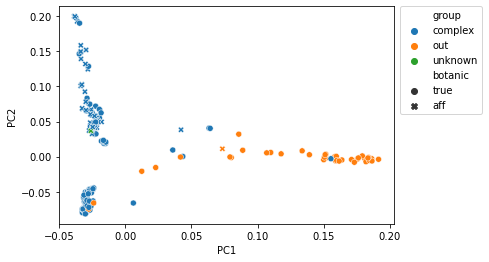

In [18]:
sns.scatterplot(data=clusters, x="PC1", y="PC2", hue="group", style="botanic")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### PCA - Within the complex

In [19]:
# We are going to replicate the PCA removing other species
! grep "complex" metadata.tsv | cut -f 2 | tail -n+1 > na
! paste na na | sed -E 's/\t/ /g' > plink/plink.keep
! rm na
! plink --bfile plink/pruned --allow-extra-chr --keep plink/plink.keep --make-bed --out plink/complex
! echo "_______________________________________________"
! plink --bfile plink/complex --allow-extra-chr --pca --out plink/complex_pca

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/complex.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/pruned
  --keep plink/plink.keep
  --make-bed
  --out plink/complex

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/complex.nosex .
--keep: 174 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.91726.
29617 variants and 174 people pass filters a

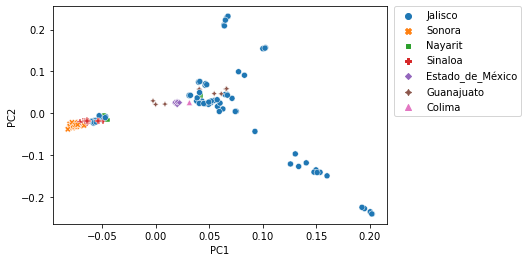

In [57]:
c_pca = pd.read_csv("plink/complex_pca.eigenvec", sep=' ', header=None)
c_pca = c_pca[[1,2,3]]
c_pca.columns = ["name", "PC1", "PC2"]
complex = pd.merge(metadata, c_pca, on="name")
complex
complex.to_csv("plink/complex.tsv", sep='\t', index=False, na_rep="NA")
# Plotting
sns.scatterplot(data=complex, x="PC1", y="PC2", hue="state", style="state")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## ADMIXTURE - All sp

In [4]:
# To run ADMIXTURE, we'll remove smaller scaffols and set chr names to integers
! grep -v "xp" populations.snps.vcf | grep -v "xf" | sed 's/Sc//g' > sc.snps.vcf
! plink --vcf sc.snps.vcf --allow-extra-chr --make-bed --out plink/admix
# Then I ran ADMIXTURE at MAZORKA, using K from 2 to 8. Results are in:
! ls admix/

admix.2.Q  admix.4.Q  admix.6.Q  admix.8.Q
admix.3.Q  admix.5.Q  admix.7.Q  cver.txt


## ADMIXTURE - Complex

In [25]:
# Using the SNPs from the largest Scaffolds, we will remove other species
! plink --bfile plink/admix --allow-extra-chr --keep plink/plink.keep --make-bed --out plink/sc_complex
# Then I ran ADMIXTURE at MAZORKA, using K from 2 to 8. Results are in:
! ls complex_admix/

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/sc_complex.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/admix
  --keep plink/plink.keep
  --make-bed
  --out plink/sc_complex

7101 MB RAM detected; reserving 3550 MB for main workspace.
63953 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/sc_complex.nosex .
--keep: 174 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.924191.
63953 variants and 174 people pass 

## Pairwise Fst

In [42]:
# Load output from R
states = pd.read_csv("pairwisefst/names.list", header=None)
states.columns = ["name"]
states = pd.merge(states, metadata, on="name")
states.to_csv("pairwisefst/states.tsv", sep='\t', index=False, na_rep="NA", header=None)

# Pairwise FST in Stacks
! cut -f 1,2 pairwisefst/states.tsv > scripts/c.popmap

In [32]:
# Pairwise FST in Stacks
! grep "complex" metadata.tsv | cut -f 2 | tail -n+1 > na
! grep "complex" metadata.tsv | cut -f 1 | tail -n+1 > id
! paste na id > scripts/c.popmap
! rm na id

In [17]:
# Select 1000 random SNPs #does not work :(
! shuf -n 50 plink/complex.bim > pairwisefst/random.bim
! plink --bfile plink/complex --allow-extra-chr --extract pairwisefst/random.bim --recode "12" --out pairwisefst/complex 

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pairwisefst/complex.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/complex
  --extract pairwisefst/random.bim
  --out pairwisefst/complex
  --recode 12

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
174 people (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to pairwisefst/complex.nosex .
--extract: 50 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.92954.
50 variants and 174 people pass 

In [25]:
! plink --bfile plink/complex --allow-extra-chr --double-id --fst --within pairwisefst/names.list --out pairwisefst/prueba

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pairwisefst/prueba.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/complex
  --double-id
  --fst
  --out pairwisefst/prueba
  --within pairwisefst/names.list

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
174 people (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to pairwisefst/prueba.nosex .
--within: 174 clusters loaded, covering a total of 174 people.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.91726.

## Identity by descent

In [23]:
# This analysis must be supplied with pruned snps
#! plink --bfile plink/pruned --allow-extra-chr --genome --out plink/ibd
! echo "_______________________________"
# Complex
! plink --bfile plink/complex --allow-extra-chr --genome --out plink/ibd_complex
! cat plink/ibd_complex.genome | sed -E 's/\s\s/\t/g' | cut -f 2,4,8,13 > plink/ibd.tsv 

_______________________________
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/ibd_complex.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/complex
  --genome 1-ibs
  --out plink/ibd_complex

Error: Invalid --genome parameter '1-ibs'.
For more information, try "plink --help <flag name>" or "plink --help | more".


## Genetic Matrices

#### Geographic distances

In [49]:
! grep "complex" metadata.tsv | sed 's/ /a/g' | cut -f 2,11,12 > locs.tsv

#### Genetic distances w/PLINK

In [24]:
# This time I will use all the SNPs and species
! plink --bfile plink/species --allow-extra-chr --distance "square" --out plink/matrix
# And for the complex
! plink --bfile plink/complex --allow-extra-chr --distance "square" '1-ibs' --out plink/complex

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/matrix.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/species
  --distance square
  --out plink/matrix

7101 MB RAM detected; reserving 3550 MB for main workspace.
72770 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/matrix.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.881947.
72770 variants and 215 people pass filters and QC.
Note: No phenotypes present.
Distance matrix calculation complete.
I

### Tajima's D Wide Genome Scan

In [2]:
! vcftools --vcf populations.snps.vcf --TajimaD 10000 --out tajid
! tail -n+2 tajid.Tajima.D | head -n6737 | sed 's/nan/NA/g'| sed 's/Sc00000/S/' > tajid.tsv


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf populations.snps.vcf
	--out tajid
	--TajimaD 10000

After filtering, kept 215 out of 215 Individuals
Outputting Tajima's D Statistic...
After filtering, kept 72770 out of a possible 72770 Sites
Run Time = 6.00 seconds


## Restriction-site-Genome Association Study

### Part 1 : SNPs associated to the tequilero phenotype

In [6]:
# Let's create a pheno file
! cat metadata.tsv | grep "complex" | tail -n+2 |awk -F '\t' '{ print $2,$2,$5 }' > plink/pheno
# Now we will merge phenotypes and run an association case/control analysis using the largest sff (To visualize)
! plink --bfile plink/sc_complex --allow-extra-chr --allow-no-sex --pheno plink/pheno --assoc --out plink/tequilero_regas
# And also for all the SNPs
! echo "______________________________"
! plink --bfile plink/species --allow-extra-chr --keep plink/plink.keep --make-bed --out plink/complex_all
! plink --bfile plink/complex_all --allow-extra-chr --allow-no-sex --pheno plink/pheno --assoc --out plink/tequilero_regas_all

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/tequilero_regas.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --assoc
  --bfile plink/sc_complex
  --out plink/tequilero_regas
  --pheno plink/pheno

7101 MB RAM detected; reserving 3550 MB for main workspace.
63953 variants loaded from .bim file.
174 people (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/tequilero_regas.nosex .
172 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 174 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.924191.
63953 varian

In [30]:
# Let's create a R readable table of the PLINK file
# I removed manually the first space in the file
# I sought for the last SNP in the 15th sff manually | head -n 2662
! cat plink/tequilero_regas.assoc | sed -E 's/\s+/\t/g' | sed 's/00000//g' > plink/tequilero_regas.tsv

In [31]:
# How many SNPs have a P valuer lower than 0.001?
! cat plink/tequilero_regas_all.assoc | sed -E 's/\s+/\t/g' > plink/tequilero_regas_all.tsv
! perl -e ' $col=8; $limit=0.001; $count=0; while(<>) { s/\r?\n//; @F=split /\t/, $_; if ($F[$col] < $limit) { $count++; print "$_\n" } } warn "\nChose $count lines out of $..\n\n" ' plink/tequilero_regas_all.tsv > plink/assoc_snps.tsv
# We'll create a bed file to browse inside genes
! cat plink/assoc_snps.tsv | awk -F '\t' '{ print $1,$3,$3,$2 }' | sed -E 's/\s/\t/g' > plink/assoc_snps.bed


Chose 1681 lines out of 29618.



In [32]:
# Which genes are located across associated SNPs?
! bedtools intersect -a ../genome/synteny/agave/mrnas.bed -b plink/assoc_snps.bed -wa > plink/asocc_genes_tequilero.bed
# How many?
! wc -l plink/asocc_genes_tequilero.bed
# Get the fasta sequences
! cut -f 4 plink/asocc_genes_tequilero.bed > plink/asocc_genes_tequilero.list
! perl -e ' ($id,$fasta)=@ARGV; open(ID,$id); while (<ID>) { s/\r?\n//; /^>?(\S+)/; $ids{$1}++; } $num_ids = keys %ids; open(F, $fasta); $s_read = $s_wrote = $print_it = 0; while (<F>) { if (/^>(\S+)/) { $s_read++; if ($ids{$1}) { $s_wrote++; $print_it = 1; delete $ids{$1} } else { $print_it = 0 } }; if ($print_it) { print $_ } }; END { warn "Searched $s_read FASTA records.\nFound $s_wrote IDs out of $num_ids in the ID list.\n" } ' plink/asocc_genes_tequilero.list ../genome/raw/proteins_ok.fasta > plink/asocc_genes_tequilero.fasta

853 plink/asocc_genes_tequilero.bed
Searched 37653 FASTA records.
Found 840 IDs out of 840 in the ID list.


In [1]:
# Blast against Asparagous ensembl-annotated proteins
# Make a database
! makeblastdb -in blast/asparagous_ensembl_proteins.fa -dbtype prot -out blast/ensembl_aoff
# Run Blast
! echo "______________________"
! blastp -query plink/asocc_genes_tequilero.fasta -db blast/ensembl_aoff -evalue 1e-30 -num_alignments 5 -outfmt 6 -out blast/regas_tequilero



Building a new DB, current time: 04/06/2022 16:58:00
New DB name:   /mnt/c/Users/52722/Desktop/Agave/popgen/blast/ensembl_aoff
New DB title:  blast/asparagous_ensembl_proteins.fa
Sequence type: Protein
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 24141 sequences in 0.792566 seconds.


______________________


##### To run a Gene Ontology Enrichment Analysis on [ShinyGO](http://bioinformatics.sdstate.edu/go/) 

In [17]:
! cut -f2 blast/regas_tequilero > blast/regas_tequilero_ensembl.ids

### Part 2 : Using Bioclimatic variables as traits

##### 2.1 To visualize in R

In [25]:
# Let's create a new file to keep
! tail -n+2 bios.tsv | cut -f 1,2 > plink/bio.keep
! plink --bfile plink/sc_complex --allow-extra-chr --allow-no-sex --keep plink/bio.keep --make-bed --out plink/bios
# Then run a linnear regression interaction to each bioclimatic value
! echo "__________________________________"
! tail -n+2 bios.tsv > plink/bios.covar
! plink --bfile plink/bios --allow-extra-chr --allow-no-sex --linear "interaction" --all-pheno --pheno plink/bios.covar --out plink/bios

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/bios.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --bfile plink/sc_complex
  --keep plink/bio.keep
  --make-bed
  --out plink/bios

7101 MB RAM detected; reserving 3550 MB for main workspace.
63953 variants loaded from .bim file.
174 people (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/bios.nosex .
--keep: 165 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 165 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.923799.
63953 variants and 165 people pas

In [28]:
# Then I createt a script to merge the results
! cat scripts/bios.sh

rm plink/regas_bios.tsv
for bio in plink/*assoc.linear
do
name=$(echo ${bio} | sed -E 's/.+bios.P(\w+).assoc.linear/bio_\1/g')
echo "Working with $name"
tail -n+2 $bio | sed -E 's/\s+/\t/g' | sed "s/ADD/${name}/g" >> plink/regas_bios.tsv
done



In [29]:
! bash scripts/bios.sh

Working with bio_1
Working with bio_10
Working with bio_11
Working with bio_12
Working with bio_13
Working with bio_14
Working with bio_15
Working with bio_16
Working with bio_17
Working with bio_18
Working with bio_19
Working with bio_2
Working with bio_3
Working with bio_4
Working with bio_5
Working with bio_6
Working with bio_7
Working with bio_8
Working with bio_9


##### Part 2.2 To find genes and GOs (ALL SNPs)

In [5]:
# Using all the SNPs
# remove individuals with no geographic/bioclim data
! plink --bfile plink/species --allow-extra-chr --allow-no-sex --keep plink/bio.keep --make-bed --out plink/geo
# Perform linear GWAS
! plink --bfile plink/geo --allow-extra-chr --allow-no-sex --linear "interaction" --all-pheno --pheno plink/bios.covar --out plink/bios_all

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/geo.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --bfile plink/species
  --keep plink/bio.keep
  --make-bed
  --out plink/geo

7101 MB RAM detected; reserving 3550 MB for main workspace.
72770 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/geo.nosex .
--keep: 165 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 165 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples is 0.923765.
72770 variants and 165 people pass filt

In [8]:
# A second script to merge the results
! cat scripts/bios_all.sh
! echo "______________________"
! bash scripts/bios_all.sh

rm plink/regas_bios_all.tsv
all=plink/bios_all*
for bio in $all*assoc.linear
do
name=$(echo ${bio} | sed -E 's/.+bios.+P(\w+).assoc.linear/bio_\1/g')
echo "Working with $name"
tail -n+2 $bio | sed -E 's/\s+/\t/g' | sed "s/ADD/${name}/g" >> plink/regas_bios_all.tsv
done

______________________
rm: cannot remove 'plink/regas_bios_all.tsv': No such file or directory
Working with bio_1
Working with bio_10
Working with bio_11
Working with bio_12
Working with bio_13
Working with bio_14
Working with bio_15
Working with bio_16
Working with bio_17
Working with bio_18
Working with bio_19
Working with bio_2
Working with bio_3
Working with bio_4
Working with bio_5
Working with bio_6
Working with bio_7
Working with bio_8
Working with bio_9


In [12]:
# How many SNPs have a P value lower than 0.001? 
# Send to a bed file
! perl -e ' $col=8; $limit=0.001; $count=0; while(<>) { s/\r?\n//; @F=split /\t/, $_; if ($F[$col] < $limit) { $count++; print "$_\n" } } warn "\nChose $count lines out of $..\n\n" ' plink/regas_bios_all.tsv | awk -F '\t' '{ print $1,$3,$3,$2 }' | sed -E 's/\s/\t/g' > plink/assoc_snps_bios.bed


Chose 102930 lines out of 1382630.



In [15]:
# Which genes are located across associated SNPs?
# Send directly to a list to get the FASTA file
! bedtools intersect -a ../genome/synteny/agave/mrnas.bed -b plink/assoc_snps_bios.bed -wa | cut -f 4 | uniq -u > plink/asocc_genes_bios.list
! echo "Number of associated genes:"
! wc -l plink/asocc_genes_bios.list
# Get the fasta
! perl -e ' ($id,$fasta)=@ARGV; open(ID,$id); while (<ID>) { s/\r?\n//; /^>?(\S+)/; $ids{$1}++; } $num_ids = keys %ids; open(F, $fasta); $s_read = $s_wrote = $print_it = 0; while (<F>) { if (/^>(\S+)/) { $s_read++; if ($ids{$1}) { $s_wrote++; $print_it = 1; delete $ids{$1} } else { $print_it = 0 } }; if ($print_it) { print $_ } }; END { warn "Searched $s_read FASTA records.\nFound $s_wrote IDs out of $num_ids in the ID list.\n" } ' plink/asocc_genes_bios.list ../genome/raw/proteins_ok.fasta > plink/asocc_genes_bios.fasta

Number of associated genes:
820 plink/asocc_genes_bios.list
Searched 37653 FASTA records.
Found 820 IDs out of 820 in the ID list.


In [16]:
# Blast against Asparagous ensembl-annotated proteins
! blastp -query plink/asocc_genes_bios.fasta -db blast/ensembl_aoff -evalue 1e-30 -num_alignments 5 -outfmt 6 -out blast/regas_bios
! cut -f2 blast/regas_bios > blast/regas_bios_ensembl.ids

#### Climate change

In [2]:
# We will replicate the previous analysis, but first, we will remove PCA-associated SNPs from the dataset
! plink --bfile plink/complex --allow-extra-chr --allow-no-sex --keep plink/bio.keep --linear "interaction" --all-pheno --pheno plink/complex_pca.eigenvec --out plink/complex_pca_assoc

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/complex_pca_assoc.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --bfile plink/complex
  --keep plink/bio.keep
  --linear interaction
  --out plink/complex_pca_assoc
  --pheno plink/complex_pca.eigenvec

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
174 people (0 males, 0 females, 174 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/complex_pca_assoc.nosex .
174 phenotype values present after --pheno.
--keep: 165 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 165 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576

In [10]:
# Create a list to select those SNPs p<0.5
! bash scripts/pca_assoc.sh
! echo "________________________"
! perl -e ' $col=8; $limit=0.001; $count=0; while(<>) { s/\r?\n//; @F=split /\t/, $_; if ($F[$col] < $limit) { $count++; print "$_\n" } } warn "\nChose $count lines out of $..\n\n" ' plink/pca_assoc.tsv | cut -f2 > plink/assoc_snps_pca.list

Working with bio_1
Working with bio_10
Working with bio_11
Working with bio_12
Working with bio_13
Working with bio_14
Working with bio_15
Working with bio_16
Working with bio_17
Working with bio_18
Working with bio_19
Working with bio_2
Working with bio_20
Working with bio_3
Working with bio_4
Working with bio_5
Working with bio_6
Working with bio_7
Working with bio_8
Working with bio_9
Working with plink/complex_pca_assoc.log
sed: -e expression #1, char 13: unknown option to `s'
Working with plink/complex_pca_assoc.nosex
sed: -e expression #1, char 13: unknown option to `s'
________________________

Chose 34883 lines out of 592340.



#### Candidate SNPs

In [44]:
# Create a file to set populations as location, remove individuals without location
# remove those from CINVESTAV
! grep "complex" metadata.tsv | grep -v "Guanajuato" | awk -F '\t' '{ print $2,$2,$10 }' | awk 'NF>2' > climate_change/populations
# Create a list of SNPs associated to bios (p<0.001)
! cut -f4 plink/assoc_snps_bios.bed > plink/assoc_snps_bios.list

In [45]:
# Isolate SNPs with low LD not associated to PC and associated to bios, then calculate frequencies by location
! plink --bfile plink/pruned --allow-extra-chr\
--extract plink/assoc_snps_bios.list\
--exclude plink/assoc_snps_pca.list \
--freq --within climate_change/populations \
--out climate_change/candidate

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to climate_change/candidate.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/pruned
  --exclude plink/assoc_snps_pca.list
  --extract plink/assoc_snps_bios.list
  --freq
  --out climate_change/candidate
  --within climate_change/populations

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to climate_change/candidate.nosex .
--extract: 10111 variants remaining.
--exclude: 1138 variants remaining.
--within: 39 clusters loaded, covering a total of 161 people.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940

#### Reference SNPs

In [54]:
# Use SNPs non associated to bios (p>0.8)
! perl -e ' $col=8; $limit=0.8; $count=0; while(<>) { s/\r?\n//; @F=split /\t/, $_; if ($F[$col] > $limit) { $count++; print "$_\n" } } warn "\nChose $count lines out of $..\n\n" ' plink/regas_bios_all.tsv | cut -f2 > climate_change/reference.list
# One file to remove both PCA and BIOS associated snps
! cat plink/assoc_snps_bios.list plink/assoc_snps_pca.list > climate_change/pcaplusbios.list


Chose 163218 lines out of 1382630.



In [55]:
# Isolate SNPs with low LD not associated to PC and not associated to bios, then calculate frequencies by location
! plink --bfile plink/pruned --allow-extra-chr\
--extract climate_change/reference.list \
--exclude climate_change/pcaplusbios.list \
--freq --within climate_change/populations \
--out climate_change/reference

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to climate_change/reference.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/pruned
  --exclude climate_change/pcaplusbios.list
  --extract climate_change/reference.list
  --freq
  --out climate_change/reference
  --within climate_change/populations

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to climate_change/reference.nosex .
--extract: 24737 variants remaining.
--exclude: 5724 variants remaining.
--within: 39 clusters loaded, covering a total of 161 people.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353

In [57]:
# convert to a table
# Remove first space manually, change CLST name to "loc"
! sed -E 's/\s+/\t/g' climate_change/candidate.frq.strat | cut -f 2,3,6 > climate_change/candidate.tsv
! sed -E 's/\s+/\t/g' climate_change/reference.frq.strat | cut -f 2,3,6 > climate_change/reference.tsv
# I reshaped the data in R

In [73]:
# Get locations coordinates
candidate = pd.read_csv("climate_change/candidate_by_loc.tsv", sep='\t')
reference = pd.read_csv("climate_change/reference_by_loc.tsv", sep='\t')
metadata = metadata[["loc", "lon", "lat"]]

candidate = pd.merge(candidate, metadata, on="loc").drop_duplicates(subset="loc") # Platanitos have more than one location
reference = pd.merge(reference, metadata, on="loc").drop_duplicates(subset="loc")

candidate.to_csv("climate_change/candidate_coor.tsv", sep='\t', index=False)
reference.to_csv("climate_change/reference_coor.tsv", sep='\t', index=False)

## Phylogenetic analysis

In [2]:
# Let's change family id to specie
! tail -n+2 metadata.tsv | awk -F '\t' '{ print $2,$2,$4,$2 }' > plink/family_as_sp 
! plink --bfile plink/pruned --allow-extra-chr --update-ids plink/family_as_sp --recode "tab" --out plink/phylo
# Now, we will create a FASTA file
! perl scripts/ped2fasta.pl "plink/phylo"

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink/phylo.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/pruned
  --out plink/phylo
  --recode tab
  --update-ids plink/family_as_sp

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink/phylo.nosex .
--update-ids: 215 people updated.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.876.
29617 variants and 215 people pass filters and QC.
Note: No

In [4]:
# Rename IDs
! cat plink/phylo.fa | sed -E 's/(Agave.+)\s(AH.+)\s0\s0\s0.+/\1_\2/g' > tree/gbs.fasta
! head -n1 tree/gbs.fasta

>Agave_angustifolia_AH1AV1SS01


#### With IQTREE - ML

In [6]:
# Align and tree construction on MAZORKA:
#! iqtree -s tree/gbs.fasta -bb 1000 -nt AUTO

#### With VCF2pop - UPGMA

In [3]:
# Let's change family id to specie
! plink --bfile plink/pruned --allow-extra-chr --update-ids plink/family_as_sp --recode "vcf" --out vcf2pop-master/pruned

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to vcf2pop-master/pruned.log.
Options in effect:
  --allow-extra-chr
  --bfile plink/pruned
  --out vcf2pop-master/pruned
  --recode vcf
  --update-ids plink/family_as_sp

7101 MB RAM detected; reserving 3550 MB for main workspace.
29617 variants loaded from .bim file.
215 people (0 males, 0 females, 215 ambiguous) loaded from .fam.
Ambiguous sex IDs written to vcf2pop-master/pruned.nosex .
--update-ids: 215 people updated.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 215 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.876.
29617 variants and 215 people

#### With MrBayes - Bayesian

In [ ]:
# Create a NEXUS file
! plink --bfile plink/pruned --allow-extra-chr --update-ids plink/family_as_sp --recode "vcf" --out tree/pruned
! python tree/vcf2phylip.py -i tree/pruned.vcf -o Agave_striata_AH1AV1SS187 -p -n

execute pruned.min4.nexus

lset nst=6 rates=gamma

mcmc ngen=20000 samplefreq=100

Average standard deviation of split frequencies = 0.196436

sump burnin=1000/10000
sumt burnin=1000/10000